In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster

# General Remarks

- Abbiamo deciso di eseguire analisi di clustering sui dati. In particolare, siamo incentrati su clustering predittivo, al fine di creare dei gruppi in cui associare cliente - prodotto (scopo principale dell'azienda). 
- Dato il problema, potrebbe essere utile partire da dei **cluster basati su prototipo**. 
- Si può analizzare l'eventualità di fare un ***overlapping incomplete clustering***. Secondo me, lo possiamo fare overlapping perché ad alcuni clienti si potrebbero associare più prodotti, e magari si può lasciare al scelta all'umano di turno; *incompleto* perché ci sono sicuramente dei clienti che sono outliers. 
- Per affrontare gli **outliers**, possiamo passare per due tecniche: includerli, e fare clustering incompleto – e in questo modo è l'algoritmo che se li deve gestire; oppure escluderli a priori con qualche criterio di selezione – e in questo caso, quando andremo a usare l'algoritmo dobbiamo sperare di aver fatto un buon lavoro.
- Per nostra "fortuna", dovremo andare a eseguire solamente **validazione supervisionata**, in quanto vogliamo vedere se il nostro cliente rientra in qualche fascia di *rischio* e/o *prodotto*.
- Dobbiamo un attimo chiarire che cosa si intenda per "**prodotto**".
- Possiamo sicuramente raggruppare una serie di misure insieme; magari per eseguire questo, possiamo fare dei **test di indipendenza statistica**, in maniera tale che il parametro finale non sia inficiato da problemi di correlazione.

In [71]:
df = pd.read_csv("DatasetClientClustering.csv", 
                 engine='c', 
                 sep=',', 
                 encoding='latin-1')
df = df.drop(df.columns[list(np.arange(8))], axis=1)

In [72]:
df = df.drop(columns=["ClientID"])

Diviamo le variabili in quelle legate alla persona, e quelle legate al suo investimento attuale.

In [60]:
current_investment = ["PortfolioRisk", "PortfolioHorizon", "AuM", "BondInvestments", "EquityInvestments",
                     "MoneyMarketInvestments", "OtherInvestments", "Cash"]
person_var = ["RiskPropension", "ClientInvestmentHorizon", "ClientKnowledgeExperience", "ClientPotentialIndex",
             "IncomeHighLow", "Sex", "Age", "IncomeNeed", "LongTermCareNeed", "ProtectionNeed",
             "InheritanceIndex", "PanicMood", "ClientDateStart", "NoTrustInBanks"]

In [85]:
df_person_var = df[person_var]
df_current_investment = df[current_investment]

Notiamo correlazione forte tra *age* e *RiskPropension*, oltre che *age* e *InheritanceIndex*. Sono correlati anche *InheritanceIndex* con *LongTermCareNeed*

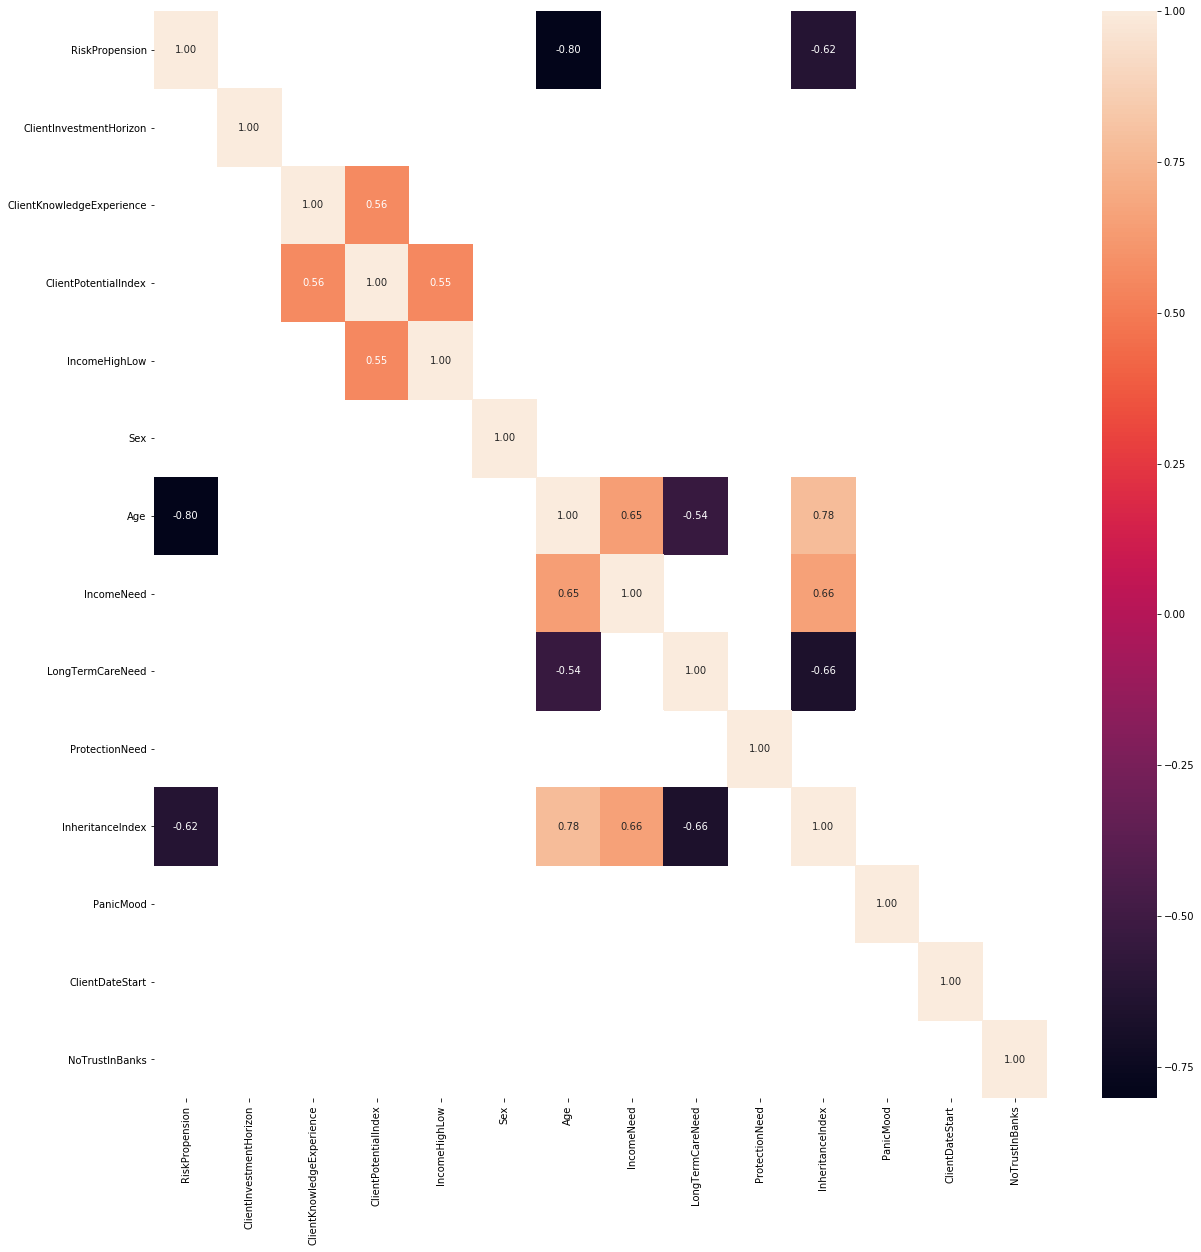

In [84]:
corr = df_person_var.corr()
df_cott = corr[abs(df_person_var.corr()) > 0.5]

plt.figure(figsize=[20,20])
sns.heatmap(df_cott,annot=True,fmt='.2f')
plt.savefig("heatmap.pdf")
plt.show()

Correlazioni interessanti tra *PortfolioHorizon* e *EquityInvestment*; e *Cash* con *BondInvestment*.

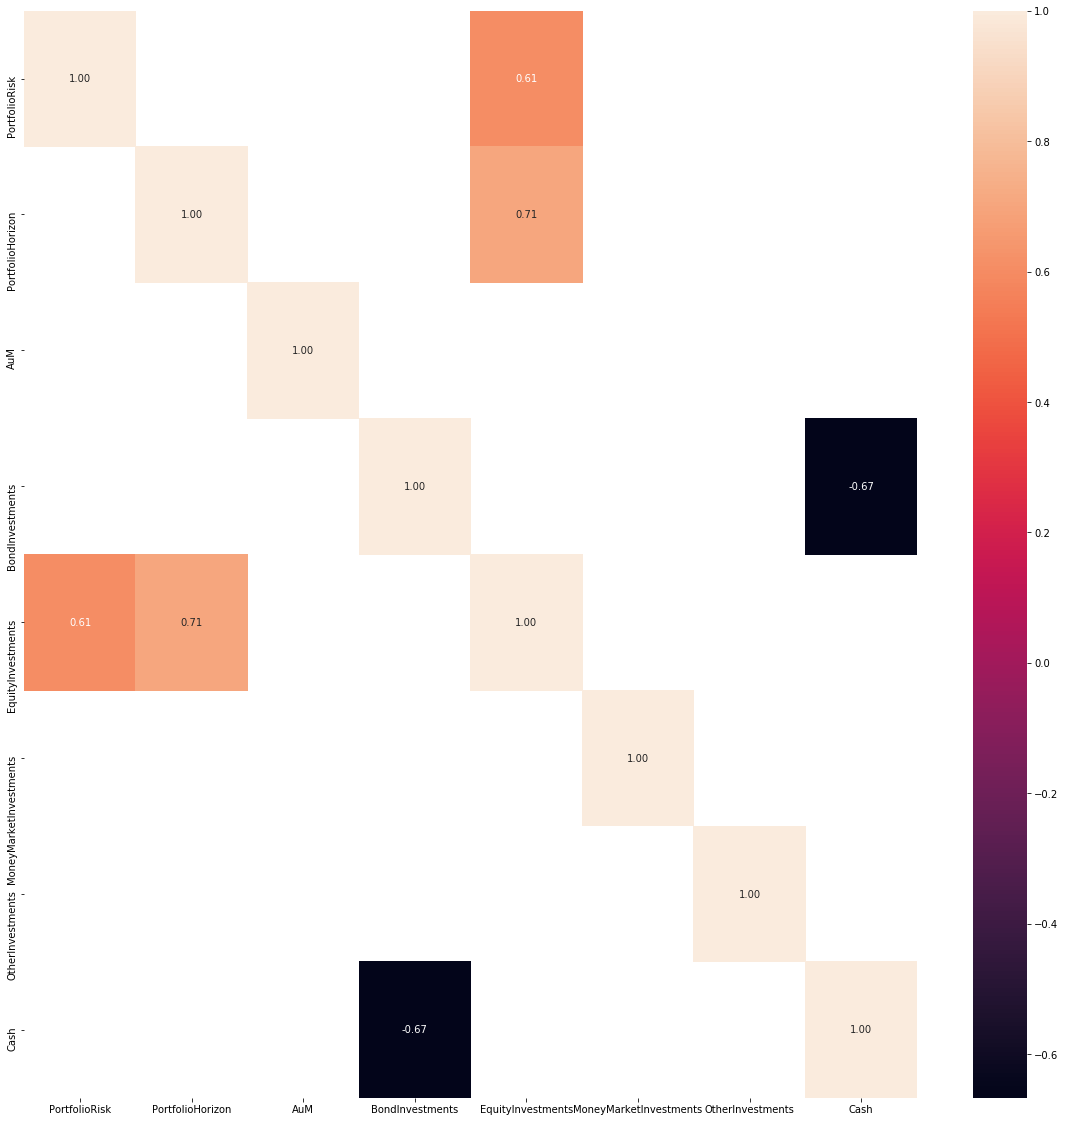

In [86]:
corr = df_current_investment.corr()
df_cott = corr[abs(df_current_investment.corr()) > 0.5]

plt.figure(figsize=[20,20])
sns.heatmap(df_cott,annot=True,fmt='.2f')
plt.savefig("heatmap.pdf")
plt.show()

AttributeError: module 'seaborn' has no attribute 'plt'

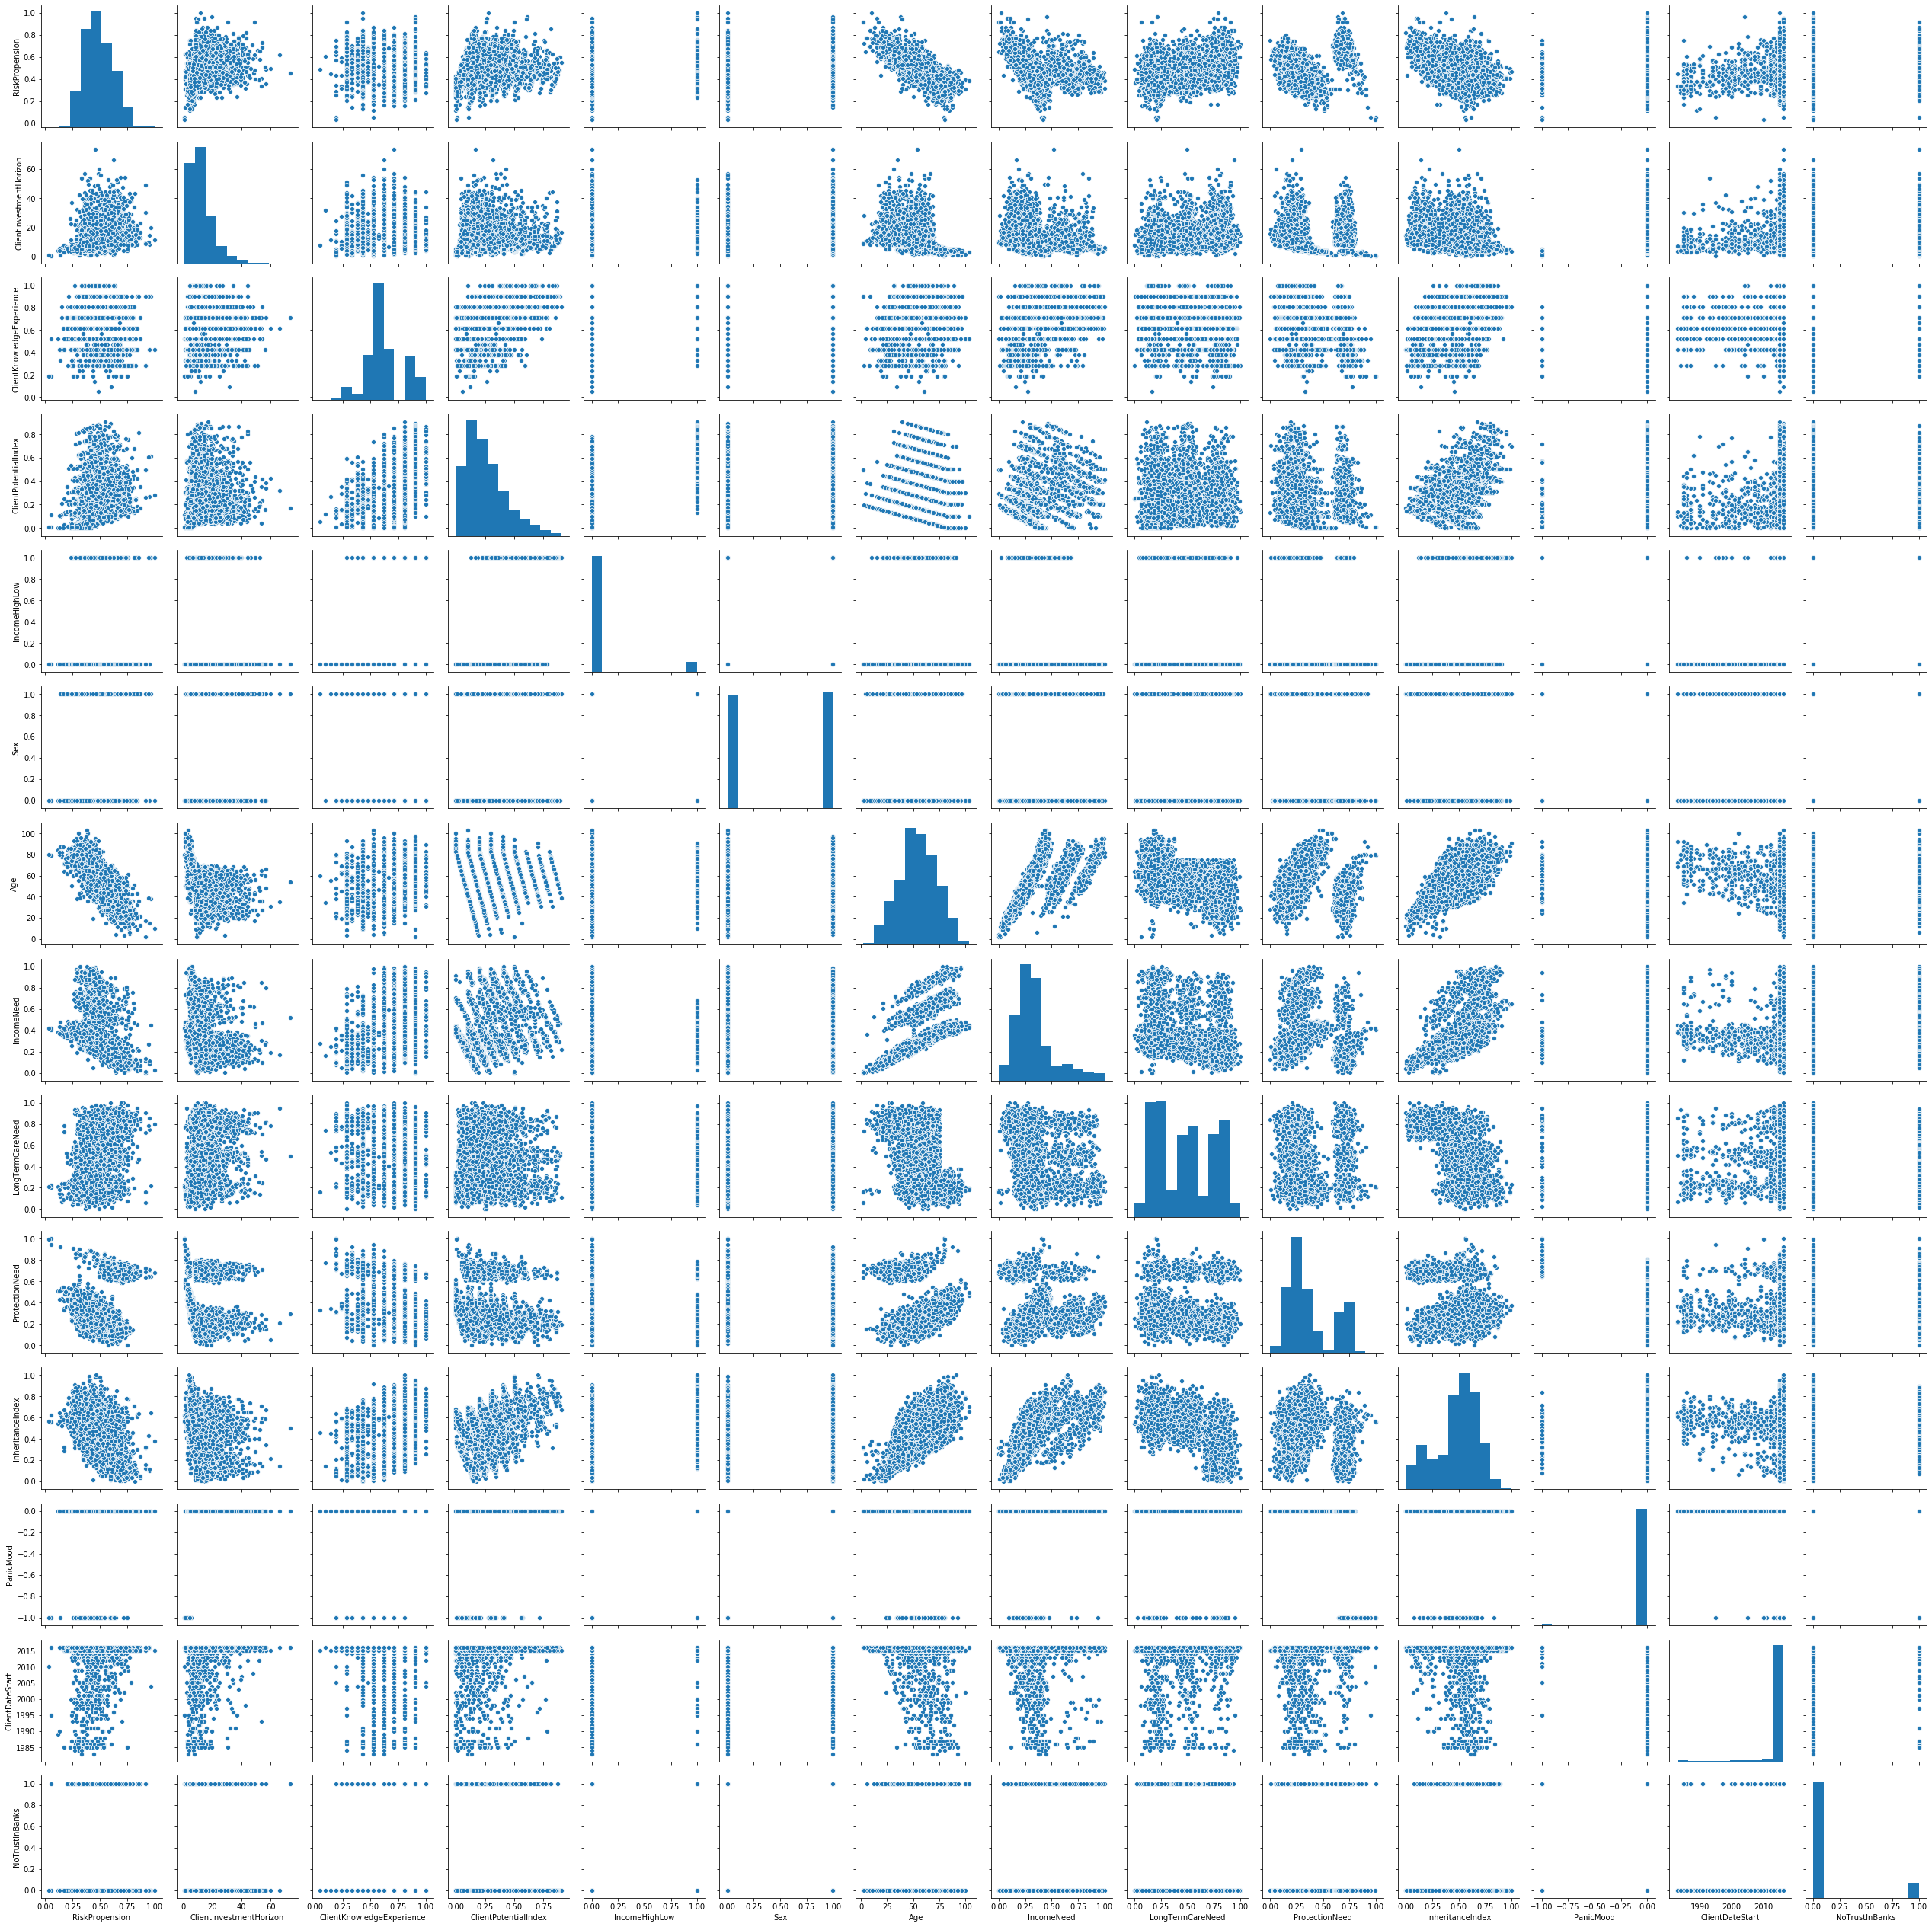

In [58]:
sns.pairplot(df_person_var)
plt.show()

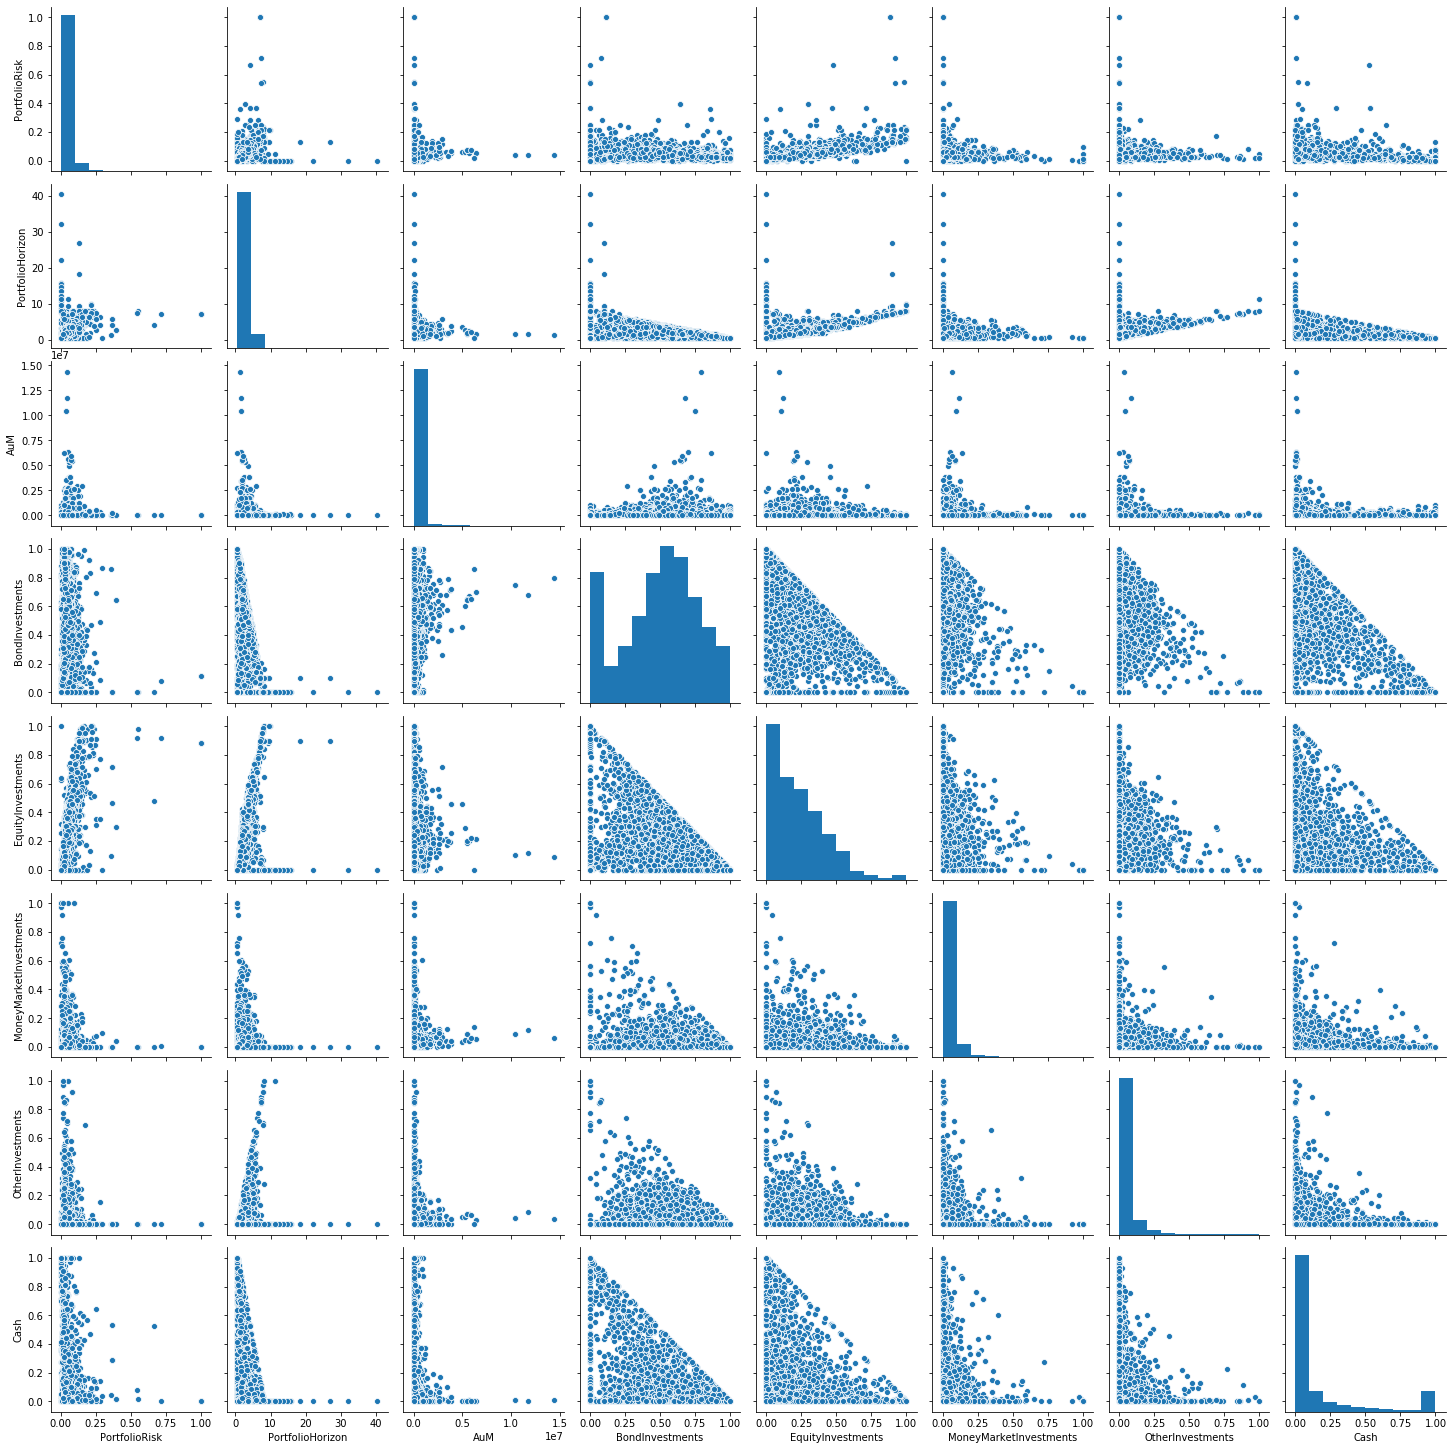

In [87]:
sns.pairplot(df_current_investment)
plt.show()

I pattern sono a triangolo perché la somma deve fare 1. 

# Feature Selection

- Eliminare colonne non interessanti (da definire)
- Raggruppare delle variabili con *feature extraction*.

# Clustering

- Fare più algoritmi e scegliere il migliore
- Capire misure di valutazione - non-supervisionata